# **K-Means Clustering Pada Dataset Spotify**
## Kelompok 7 Praktikum Damin RC

**Deskripsi Atribut Dataset Spotify :**

* track_id: Pengidentifikasi unik untuk setiap trek dalam dataset.
* track_name: Judul trek.
* track_artist: Artis atau artis yang membawakan trek.
* track_popularity: Ukuran seberapa populer trek di Spotify.
* track_album_id: Pengidentifikasi unik untuk album tempat trek tersebut berada.
* track_album_name: Nama album tempat trek tersebut berada.
* track_album_release_date: Tanggal album tempat trek tersebut berada dirilis.
* playlist_name: Nama playlist tempat trek tersebut disertakan.
* playlist_id: Pengidentifikasi unik untuk playlist tempat trek tersebut disertakan.
* playlist_genre: Genre utama playlist tempat trek tersebut disertakan.
* playlist_subgenre: Subgenre playlist tempat trek tersebut disertakan.
* danceability: Ukuran seberapa lincah trek.
* energy: Ukuran seberapa energik trek.
* key: Kunci musik trek.
* loudness: Ukuran seberapa keras trek.
* mode: Mode trek, yang bisa mayor atau minor.
* speechiness: Ukuran seberapa banyak percakapan yang ada dalam trek.
* acousticness: Ukuran seberapa akustik trek.
* instrumentalness: Ukuran seberapa instrumental trek.
* liveness: Ukuran seberapa besar kemungkinan trek dibawakan secara live.
* valence: Ukuran seberapa positif atau negatif suasana trek.
* tempo: Tempo trek, diukur dalam ketukan per menit (BPM).
* duration_ms: Durasi trek, diukur dalam milidetik (ms).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data loading and description

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/PrakDamin/Modul 4/spotify.csv")
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
data = data.dropna()
data.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Convert 'track_album_release_date' to datetime
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'])

<ipython-input-8-cee928c6087a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'])


In [ ]:
# Select relevant features for clustering
selected_features = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
selected_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
from scipy import stats

# Menghitung Z-Score untuk setiap kolom dalam DataFrame
z_scores = stats.zscore(selected_features)

# Menentukan batas Z-Score untuk mendeteksi outlier (biasanya menggunakan threshold 3 atau -3)
threshold = 3

# Membuat DataFrame baru yang berisi boolean value True jika nilai Z-Score melebihi threshold, dan False sebaliknya
outliers = (abs(z_scores) > threshold).all(axis=1)

# Menampilkan baris yang mengandung outlier
outlier_rows = data[outliers]
print("Outlier Rows:")
print(outlier_rows)


Outlier Rows:
Empty DataFrame
Columns: [track_id, track_name, track_artist, track_popularity, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_id, playlist_genre, playlist_subgenre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms]
Index: []

[0 rows x 23 columns]


### Visualization

<Axes: xlabel='danceability', ylabel='energy'>

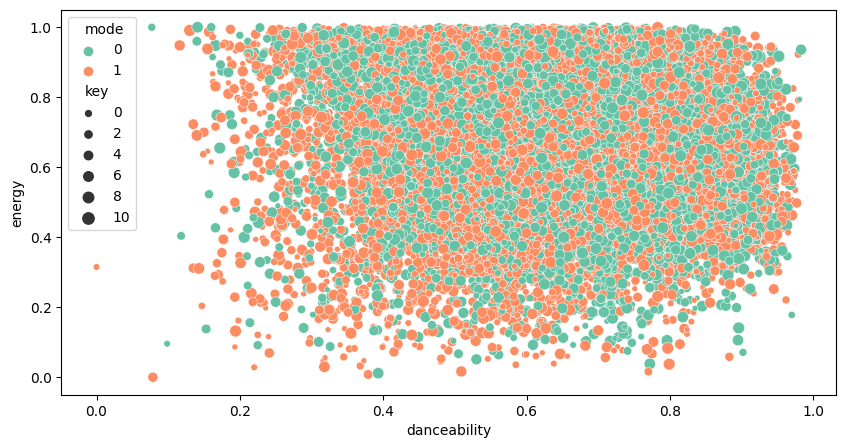

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=data,
    x="danceability",
    y="energy",
    hue="mode",
    palette="Set2",
    size='key',
)

- Plot ini menunjukkan hubungan antara danceability dan energy dari suatu lagu, diwarnai berdasarkan mode lagu. Ukuran titik menunjukkan key lagu.

- Danceability adalah ukuran seberapa mudah suatu lagu untuk ditarikan. Energy adalah ukuran seberapa energik suatu lagu. Mode adalah skala musik yang digunakan dalam lagu.

- ecara umum, plot ini menunjukkan bahwa lagu dengan danceability yang tinggi juga memiliki energy yang tinggi. Namun, ada beberapa pengecualian. Misalnya, ada beberapa lagu dengan danceability yang tinggi tetapi energy yang rendah, seperti lagu balada. Ada juga beberapa lagu dengan energy yang tinggi tetapi danceability yang rendah, seperti lagu metal.

### Normalizing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(selected_features)

### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

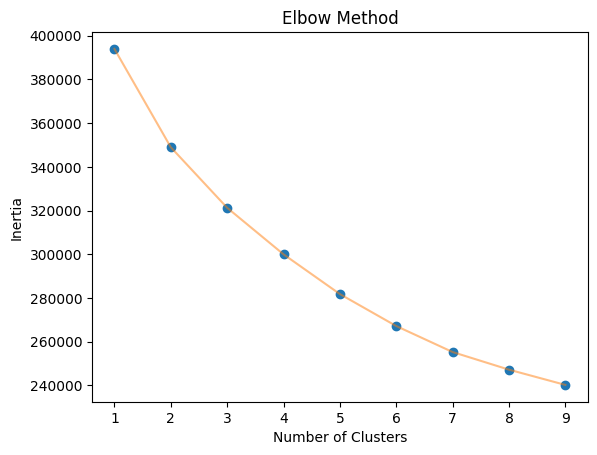

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Elbow method
def elbow_plot(data, clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init='k-means++',
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)

    # Plot
    plt.plot(np.arange(1, clusters), inertia, 'o')
    plt.plot(np.arange(1, clusters), inertia, '-', alpha=0.5)
    plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show();

# Apply the elbow method
elbow_plot(normalized_features, clusters=10)

Hasil analisis elbow method menunjukkan bahwa jumlah cluster optimal adalah 3. Hal ini dapat dilihat dari grafik yang berbentuk siku pada titik k = 3. Pada titik ini, nilai inertia mengalami penurunan yang signifikan, sedangkan pada titik k yang lebih tinggi, nilai inertia masih mengalami penurunan, tetapi dengan penurunan yang lebih kecil.

In [ ]:
# Choose the optimal number of clusters (e.g., from the elbow method)
optimal_clusters = 3

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data['cluster'] = kmeans.fit_predict(normalized_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


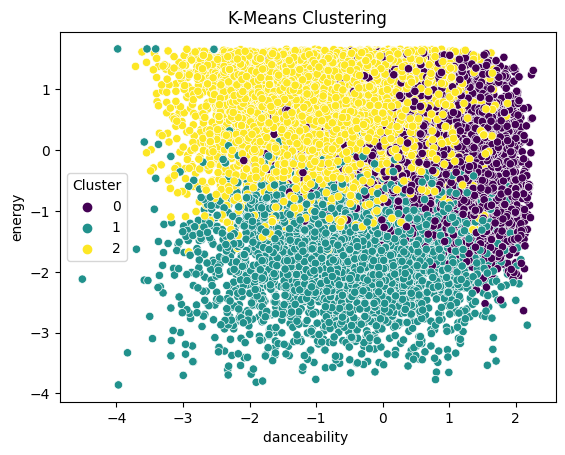

In [ ]:
import seaborn as sns

sns.scatterplot(x=normalized_features[:, 0], y=normalized_features[:, 1], hue=data['cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('danceability ')
plt.ylabel('energy')
plt.legend(title='Cluster')  # Add legend with a title
plt.show()

### K-Means Clustering 3D Plot

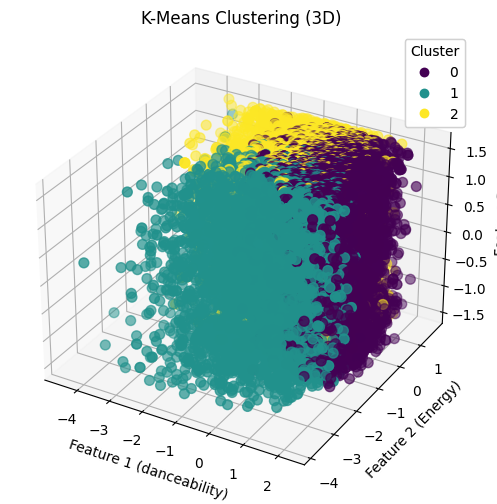

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'normalized_features' is a 2D array with three features
x = normalized_features[:, 0]
y = normalized_features[:, 1]
z = normalized_features[:, 2]  # Add the third feature

scatter = ax.scatter(x, y, z, c=data['cluster'], cmap='viridis', s=50)

ax.set_xlabel('Feature 1 (danceability)')
ax.set_ylabel('Feature 2 (Energy)')
ax.set_zlabel('Feature 3')  # Add the name of the third feature

legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

plt.title('K-Means Clustering (3D)')
plt.show()


### Gabungan Plot 2D dan 3D

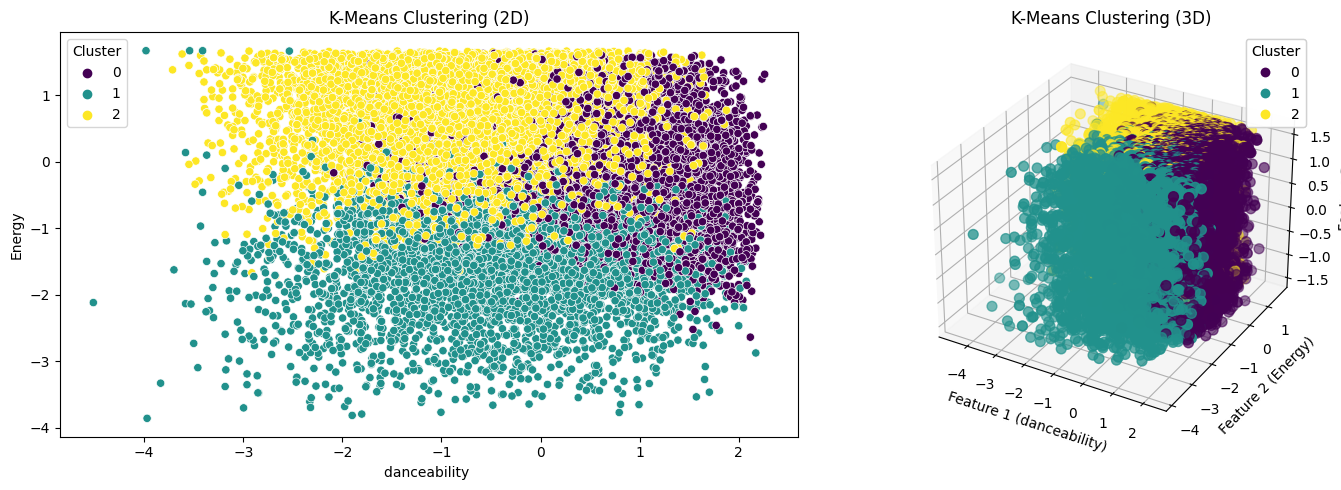

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'normalized_features' is a 2D array with three features
x = normalized_features[:, 0]
y = normalized_features[:, 1]
z = normalized_features[:, 2]  # Add the third feature

# 2D scatter plot
plt.figure(figsize=(15, 5))

plt.subplot(121)  # 1 row, 2 columns, subplot 1
sns.scatterplot(x=x, y=y, hue=data['cluster'], palette='viridis')
plt.title('K-Means Clustering (2D)')
plt.xlabel('danceability ')
plt.ylabel('Energy')
plt.legend(title='Cluster')

# 3D scatter plot
ax = plt.subplot(122, projection='3d')  # 1 row, 2 columns, subplot 2
scatter = ax.scatter(x, y, z, c=data['cluster'], cmap='viridis', s=50)

ax.set_xlabel('Feature 1 (danceability)')
ax.set_ylabel('Feature 2 (Energy)')
ax.set_zlabel('Feature 3')
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

plt.title('K-Means Clustering (3D)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### **Deskripsi Atribut :**
* dancebility  <br>
 Danceability menggambarkan seberapa cocok suatu lagu untuk menari berdasarkan kombinasi elemen musik termasuk tempo, stabilitas ritme, kekuatan ketukan, dan keteraturan secara keseluruhan. Nilai 0,0 adalah yang paling tidak dapat ditarikan dan 1,0 adalah yang paling dapat ditarikan.


* energy <br>
 ukuran dari 0,0 hingga 1,0 dan mewakili ukuran persepsi intensitas dan aktivitas. Biasanya, trek yang energik terasa cepat, keras, dan berisik. Fitur persepsi yang berkontribusi terhadap atribut ini meliputi rentang dinamis, kenyaringan yang dirasakan, timbre, laju permulaan, dan entropi umum.


### **Analisis**
* "0" (Ungu) : Tingkat danceability tinggi dengan tingkat energi tinggi. Lagu-lagu tersebut memiliki tempo yang cepat dan upbeat, serta pola ketukan yang kuat dan teratur. Hal ini membuat lagu-lagu tersebut sangat cocok untuk menari.<br><br>
* "1" (Hijau): Tingkat danceability rata-rata hingga tinggi dengan tingkat energi menengah hingga rendah. lagu-lagu tersebut memiliki tempo yang sedang atau cepat, serta pola ketukan yang cukup kuat dan teratur. Hal ini membuat lagu-lagu tersebut masih cukup cocok untuk menari, tetapi tidak seenergik lagu-lagu pada tingkat danceability 0<br><br>
* "2" (Kuning): Tingkat danceability rendah dengan tingkat energi tinggi. lagu-lagu tersebut memiliki tempo yang cepat, tetapi pola ketukannya tidak terlalu kuat atau teratur. Hal ini membuat lagu-lagu tersebut kurang cocok untuk menari, karena pola ketukan yang tidak teratur dapat menyulitkan orang untuk mengikuti irama.

### Evaluasi Hasil

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(normalized_features, data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.10020693742331231


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(normalized_features, data['cluster'])
print(f"Indeks Davies-Bouldin: {db_index}")


Indeks Davies-Bouldin: 2.528854934574143


Nilai Silhouette Score yang diperoleh adalah 0.10020693742331231. Nilai ini cukup rendah, sehingga menunjukkan bahwa data point dalam dataset Spotify.csv kurang cocok dengan clusternya. Nilai Indeks Davies-Bouldin yang diperoleh adalah 2.528854934574143. Nilai ini cukup tinggi, sehingga menunjukkan bahwa cluster-cluster yang terbentuk saling bertumpang tindih. Hal ini dapat disebabkan oleh beberapa faktor, seperti:
- Fitur-fitur yang digunakan untuk clustering tidak cukup untuk membedakan antar cluster.
- Jumlah cluster yang terbentuk terlalu banyak.
- Data point dalam dataset Spotify.csv memiliki variasi yang tinggi.

Berdasarkan kedua hasil tersebut, disimpulkan bahwa hasil k-means clustering pada dataset Spotify.csv kurang optimal.


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(normalized_features, data['cluster'])
print(f"Indeks Calinski-Harabasz: {ch_index}")


Indeks Calinski-Harabasz: 3713.44424129157


- Indeks Calinski-Harabasz (CH) adalah ukuran yang digunakan untuk mengevaluasi kualitas hasil clustering. Nilai indeks CH yang tinggi menunjukkan bahwa cluster-cluster yang terbentuk lebih terpisah satu sama lain dan lebih konsisten secara internal.

- Berdasarkan nilai indeks CH yang diperoleh, yaitu 3713.44424129157, dapat disimpulkan bahwa hasil clustering pada dataset Spotify.csv cukup baik. Hal ini menunjukkan bahwa variance antar kluster lebih besar dibandingkan variance dalam kluster.

- Ini dianggap sebagai indikasi dari clustering yang baik, di mana kluster-kluster memiliki batasan yang baik antara satu sama lain. Cluster-cluster yang terbentuk lebih terpisah satu sama lain dan lebih konsisten secara internal. Namun, masih ada beberapa hal yang dapat ditingkatkan, seperti menambahkan fitur-fitur baru untuk membedakan antar cluster dan mengurangi jumlah cluster yang terbentuk.




